# Task 2

First, we import the required libraries.

In [7]:
import PIL
from PIL import Image
import os
from matplotlib import image
from matplotlib import pyplot
import numpy as np
from numpy import asarray
import random
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA


Then, we load the image I have choosen for this task. By adjusting the folder in the code line "os", image location can be determined.

In [8]:
os.chdir('/Users/yunusutaro/Desktop/IE 582 Projects/Homework -2')
Pic = Image.open('Original Image.jpg')
data = image.imread('Original Image.jpg')


For clearance; format, shape and mode of the picture is printed. Additionally, picture is displayed.

Populating the interactive namespace from numpy and matplotlib
JPEG
RGB
(256, 256)


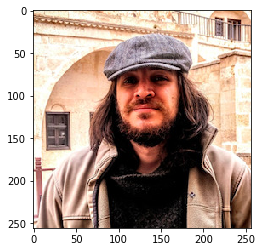

In [10]:
%pylab inline
print(Pic.format)
print(Pic.mode)
print(Pic.size)
imgplot = plt.imshow(Pic)
plt.show()


Red, Green and Blue dimensions are displayed in order in the code below.

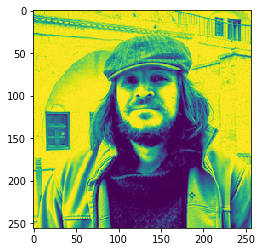

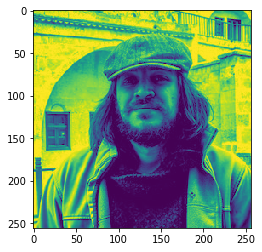

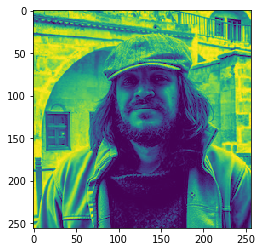

In [12]:
pyplot.imshow(data[:, :, 0])
pyplot.show()

pyplot.imshow(data[:, :, 1])
pyplot.show()

pyplot.imshow(data[:, :, 2])
pyplot.show()


Task requires us to add noise for each red, green and blue channel invidivually. Additionally, the noise will be in the range between the minimum and the 0.1 * maximum pixel value of each column of each channel. Thus, we first generate 3 seperate arrays referring to red, green and blue.

In [13]:
a = data[0:256,0:256, 0]
b = data[0:256,0:256, 1]
c = data[0:256,0:256, 2]

Then, we write a custom function for this task.

In [15]:
a1 = a[:, 0].reshape(-1,1)
b1 = b[:, 0].reshape(-1,1)
c1 = c[:, 0].reshape(-1,1) 



for x in range(0, 256):
  random = np.random.uniform(low = max(a[:, x])*0.1, high =min(a[:,x],),size = (256,1))  
  col = a[:, x].reshape(-1,1) + random
  a1 = np.append(a1, col, 1)
  random = np.random.uniform(low = max(b[:, x])*0.1, high =min(b[:,x],),size = (256,1))  
  col = b[:, x].reshape(-1,1) + random
  b1 = np.append(b1, col, 1)  
  random = np.random.uniform(low = max(c[:, x])*0.1, high =min(c[:,x],),size = (256,1))  
  col = c[:, x].reshape(-1,1) + random
  c1 = np.append(c1, col, 1)  

a1 = a1[:, 1:]  
b1 = b1[:, 1:]  
c1 = c1[:, 1:]  
  

After adding the noise, we combine these numpy arrays in order to obtain a new image in the format of uint8.

In [16]:
newimage = np.dstack((a1,b1,c1)).astype(np.uint8)  

We will display r,g and b channels of the noisy picture.

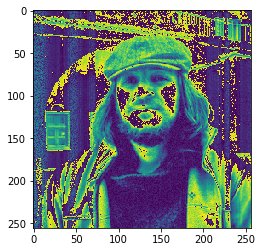

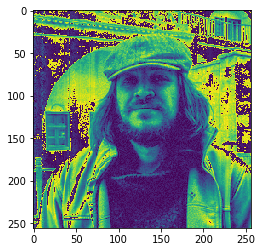

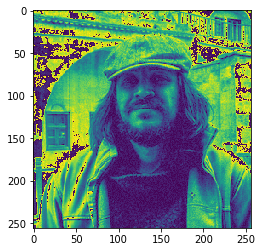

In [17]:
pyplot.imshow(newimage[:, :, 0])
pyplot.show()  

pyplot.imshow(newimage[:, :, 1])
pyplot.show()  

pyplot.imshow(newimage[:, :, 2])
pyplot.show()  
      

When combined, noisy image becomes the image below.

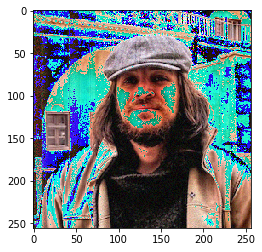

In [18]:
pyplot.imshow(newimage)
pyplot.show()  

For further operations, we convert our picture into a greyscaled picture. Reason for doing this is the fact that pictures in rgb format are 3D arrays, which makes applying mathematical operations impossible sometimes. According to the most of the formulas, greyscale conversion is done by multiplying r,g and b channels with constants and summing them up. For this task, constants for r,g, and b are chosen as 0.07, 0.72 and 0.21.

In [19]:
def grayscale(colors):
    r, g, b = colors
    return 0.07 * r + 0.72 * g + 0.21 * b

result = np.apply_along_axis(grayscale, 2, newimage)

Greyscale image is displayed below.

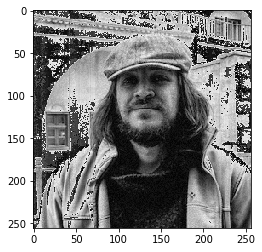

In [20]:
plt.imshow(result, cmap='gray')


Now, the task demands us to extract patches from the image in the size of 25x25 pixels. For this task, scikit-learn library will be used.

In [21]:
from sklearn.feature_extraction import image
patches = image.extract_patches_2d(result, (25, 25))


The used code generates an 3D array in the shape of (53824, 25, 25). However, PCA requires us to use 2D arrays. Thus, by using Numpy, we will convert this into an 2D array (reversing operation will be executed later).

In [22]:
patches = np.reshape(patches, (53824, 625))

Now, we will apply PCA.

In [23]:
pca = PCA(n_components=625)
pca.fit(patches)  
print(pca.explained_variance_ratio_)  

[4.59704491e-01 7.96864609e-02 4.60697993e-02 2.78510727e-02
 2.00277200e-02 1.57431743e-02 1.54317198e-02 1.02710260e-02
 9.87662113e-03 8.98407674e-03 8.57694578e-03 8.24076739e-03
 7.11224707e-03 5.39718995e-03 5.13997635e-03 5.08475527e-03
 4.45273372e-03 4.08620202e-03 4.03609584e-03 3.84434127e-03
 3.67451539e-03 3.22080577e-03 3.07477272e-03 2.95441753e-03
 2.61854445e-03 2.53566547e-03 2.30127329e-03 2.28639637e-03
 2.22872407e-03 2.19441178e-03 1.94121627e-03 1.92454905e-03
 1.88790458e-03 1.78113021e-03 1.76878025e-03 1.73916530e-03
 1.72972884e-03 1.70009216e-03 1.65111899e-03 1.51353105e-03
 1.48077195e-03 1.46588178e-03 1.46156291e-03 1.43051455e-03
 1.40996422e-03 1.40508363e-03 1.34957534e-03 1.34584159e-03
 1.29969182e-03 1.28837539e-03 1.26851012e-03 1.26097428e-03
 1.21669220e-03 1.20758560e-03 1.17194831e-03 1.13973460e-03
 1.12749667e-03 1.09779516e-03 1.08078851e-03 1.06366245e-03
 1.05638483e-03 1.04508015e-03 1.04327402e-03 1.02256456e-03
 1.01423910e-03 9.942276

As seen on the results above, first 8 components explain 70% of the variance in the data and the effect of the principal components reduce drammatically after that component. Thus, using these 7 components would be reasonable in dimensionality reduction.

Now, we will reconstruct the image from using first component.

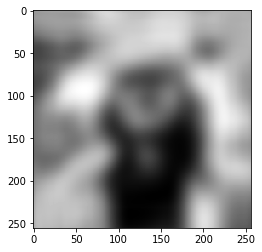

In [24]:
pca = PCA(n_components=1)
mu = np.mean(patches, axis=0)
pca.fit(patches)

nComp = 1
Xhat = np.dot(pca.transform(patches)[:,:nComp], pca.components_[:nComp,:])
Xhat += mu


r1 = np.reshape(Xhat, (53824,25,25))
r1 = image.reconstruct_from_patches_2d(r1, (256,256))

plt.imshow(r1, cmap='gray')

As seen above, using the first principal component only gives a brief idea about the image. Now, we will see the effect of 2nd principal component.

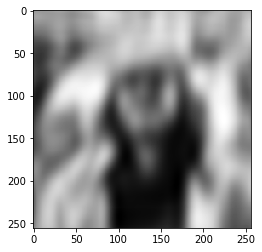

In [25]:
pca = PCA(n_components=2)
mu = np.mean(patches, axis=0)
pca.fit(patches)

nComp = 2
Xhat = np.dot(pca.transform(patches)[:,:nComp], pca.components_[:nComp,:])
Xhat += mu


r1 = np.reshape(Xhat, (53824,25,25))
r1 = image.reconstruct_from_patches_2d(r1, (256,256))

plt.imshow(r1, cmap='gray')

A slightly better image is obtained by including 2nd principal component. We will try that again for 3rd component.

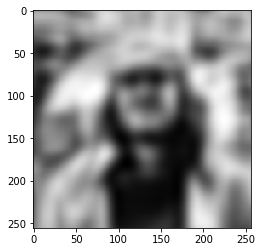

In [26]:
pca = PCA(n_components=3)
mu = np.mean(patches, axis=0)
pca.fit(patches)

nComp = 3
Xhat = np.dot(pca.transform(patches)[:,:nComp], pca.components_[:nComp,:])
Xhat += mu


r1 = np.reshape(Xhat, (53824,25,25))
r1 = image.reconstruct_from_patches_2d(r1, (256,256))

plt.imshow(r1, cmap='gray')

Including the third principal component enhances the model performance even more. For getting a general idea of the PCA, we will use the first 8 components, as they explain 70% of the variance as stated above.

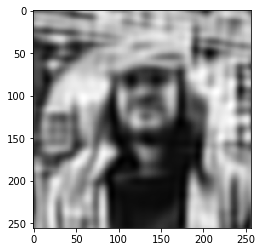

In [27]:
pca = PCA(n_components=8)
mu = np.mean(patches, axis=0)
pca.fit(patches)

nComp = 8
Xhat = np.dot(pca.transform(patches)[:,:nComp], pca.components_[:nComp,:])
Xhat += mu


r1 = np.reshape(Xhat, (53824,25,25))
r1 = image.reconstruct_from_patches_2d(r1, (256,256))

plt.imshow(r1, cmap='gray')

Image becomes even more similar to the real image by using 8 components. We will look for 50 Principal components for investigating the results.

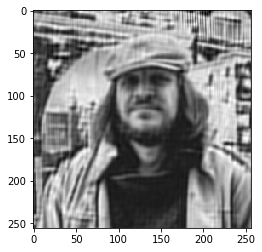

In [28]:
pca = PCA(n_components=50)
mu = np.mean(patches, axis=0)
pca.fit(patches)

nComp = 50
Xhat = np.dot(pca.transform(patches)[:,:nComp], pca.components_[:nComp,:])
Xhat += mu


r1 = np.reshape(Xhat, (53824,25,25))
r1 = image.reconstruct_from_patches_2d(r1, (256,256))

plt.imshow(r1, cmap='gray')

And 100 principal components.

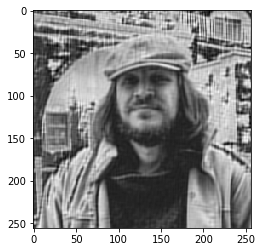

In [29]:
pca = PCA(n_components=100)
principalComponents = pca.fit_transform(patches)
mu = np.mean(patches, axis=0)
pca.fit(patches)

nComp = 100
Xhat = np.dot(pca.transform(patches)[:,:nComp], pca.components_[:nComp,:])
Xhat += mu


r1 = np.reshape(Xhat, (53824,25,25))
r1 = image.reconstruct_from_patches_2d(r1, (256,256))

plt.imshow(r1, cmap='gray')

By using 100 principal components, image becomes nearly identical to the original image. However, by conducting these experiments, it is observed that PCA is succesful in showing the which has 625 features by using small number of principal components, namely 8. Even a single principal component is succesful in giving a general idea about the image.